In [1]:
import pandas as pd
import numpy as np
import ModelMaker as mm

In [2]:
lst = [11,12,13,14,15,16,17,18,19,20,21]
df_goalie = pd.read_csv('data/PBP/EH_GOALIE_11-21.csv')
df_goalie.Player = df_goalie.Player.str.replace('.',' ',regex=True).str.title()
df_import = pd.DataFrame()
for year in lst:
    print(year)
    stats   = pd.read_csv(f'data/PBP/ready_to_model/with_players/{year-1}_{year}_pbp_cleaned.csv')
    goalies = df_goalie[df_goalie.Season == f'{year-1}-{year}'].copy()
    gsax_dict = dict(zip(goalies.Player, goalies.GSAx))
    stats.home_goalie = stats.home_goalie.apply(lambda x:gsax_dict[x])
    stats.away_goalie = stats.away_goalie.apply(lambda x:gsax_dict[x])
    df_import = df_import.append(stats)

11
12
13
14
15
16
17
18
19
20
21


In [3]:
df_import['goalie_strength'] = np.where((df_import.is_home ==1),df_import.home_goalie,df_import.away_goalie)
drp_lst = ['home_on_1','home_on_2','home_on_3','home_on_4',
           'home_on_5','home_on_6','home_on_7','home_goalie',
           'away_on_1','away_on_2','away_on_3','away_on_4',
           'away_on_5','away_on_6','away_on_7','away_goalie',]
df_model = df_import.drop(drp_lst, axis=1)
#df_original = df_model.drop(['goalie_strength'],axis=1)

In [11]:
df_model.columns

Index(['Unnamed: 0', 'game_period', 'game_seconds', 'is_home', 'coords_x',
       'coords_y', 'coords_x_last', 'coords_y_last', 'shot_distance',
       'shot_angle', 'state_5v5', 'state_5v4', 'score_down_4', 'score_down_3',
       'score_down_2', 'score_down_1', 'score_even', 'score_up_1',
       'score_up_2', 'score_up_3', 'wrist_shot', 'deflected_shot', 'tip_shot',
       'slap_shot', 'backhand_shot', 'snap_shot', 'prior_shot_same',
       'prior_miss_same', 'prior_shot_opp', 'prior_miss_opp', 'prior_give_opp',
       'prior_take_opp', 'prior_hit_opp', 'prior_face', 'state_5v3',
       'score_up_4', 'wrap_shot', 'prior_block_same', 'prior_block_opp',
       'prior_give_same', 'prior_take_same', 'prior_hit_same', 'is_goal',
       'goalie_strength'],
      dtype='object')

In [4]:
model_goalie = mm.run_XGB(df_model)

Running XGB model, please be patient
Fitting the test data to the model
The Log loss is 0.19392
The R^2 value is 0.0599


In [12]:
df_bot_4 = df_model.drop(['score_up_1'],axis=1)
model_goalie = mm.run_XGB(df_bot_4)

Running XGB model, please be patient
Fitting the test data to the model
The Log loss is 0.19387
The R^2 value is 0.0602


In [14]:
df_bot_5 = df_model.drop(['score_up_1','score_even'],axis=1)
model_goalie = mm.run_XGB(df_bot_5)

Running XGB model, please be patient
Fitting the test data to the model
The Log loss is 0.19394
The R^2 value is 0.06


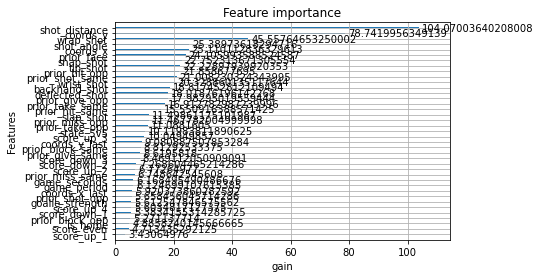

In [7]:
#Original with goalie
mm.plot_xgb(model=model_goalie,show_feat=40,type='gain')

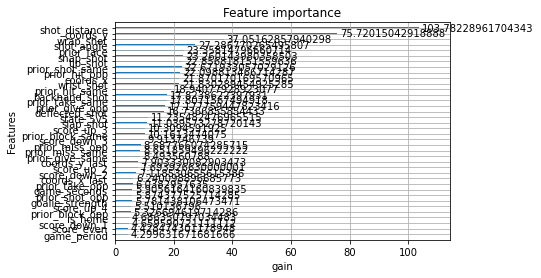

In [13]:
#removal of gain less than 4
mm.plot_xgb(model=model_goalie,show_feat=40,type='gain')

In [ ]:
model_original = mm.run_XGB(df_original)

In [ ]:
model_goalie = mm.run_XGB(df_model)

In [ ]:
mm.plot_xgb(model=model_goalie,show_feat=30,type='gain')

In [ ]:
mm.plot_xgb(model=model_original)

In [ ]:
mm.plot_xgb(model=model_goalie)

In [ ]:
mm.plot_xgb(model=model_goalie,type='gain')

In [ ]:
mm.plot_xgb(model=model_goalie,type='cover')

In [ ]:
model_goalie_tab = mm.run_tabnet(df_model)

In [ ]:
model_goalie_tab = mm.run_tabnet(df_original)